# Chinese Text into Image
-----------
### Step 1: Input text

In the bottom cells, you may find the `TEXT` variable. Input your desired text there.
If you wish to manually seperate two paragraphs from one page, you may use `<br>` as an independent paragraph. This will start a new page.

```
TEXT = '''奶粉，白色的粉末，
滋養嬰兒，成就未來。
初生嬰兒，純真無邪，
母乳難得，奶粉來替。

愛，如奶粉般滋養，
陪伴嬰兒，成長茁壯。
家人的關愛，如奶粉般溫暖，
讓我們茁壯成長，支持著我們的未來。

恨，如奶粉般複雜，
假貨橫行，毒奶事件層出不窮。
嬰兒的健康，如奶粉般珍貴，
卻被不負責任的商家，輕易地犧牲。

<br>

奶粉，愛恨交織的代表，
滋養著嬰兒，卻也蘊藏著危險。
但願我們的愛，能像奶粉般純淨，
讓所有的嬰兒，都能健康茁壯成長。'''
```

-------------
### Step 2: Select attributes

There are many attributes to select from.

#### 1. PAGE

    This is the size of the canvas.
    
    (Default: 1080, 1080)

#### 2. MARGIN

    This is the margin of the canvas.
    Note: Right margin is not yet implemented, but can be controlled by the MAX_LINE_LENGTH

    (Default: 108, 103)

#### 3. MAX_LINE_LENGTH

    The maximum amount of characters per paragraph.
    
    (Default: 27)

#### 4. FONT_SIZE

    Font size of text in pixels

    (Default : 35)

#### 5. LINE_SPACING

    Amount of space between each line of text

    (Default: 53.5 - FONT_SIZE)

#### 6. FONT

    Pillow's ImageFont.truetype function. Can be changed to other fonts in your local directory.

    (Default: `ImageFont.truetype('./font/NotoSansTC-Medium.otf', size=FONT_SIZE)`)

#### 7. BASE_COLOR

    The Base Color of the Canvas.

    (Default: #ffffff)

#### 8. TEXT_COLOR

    The Color of the Text.

    (Default: #324450)

#### 9. isJPTWStyledPunctuation

    Puts the comma and period of the sentence to the bottom left corner, instead of being in the middle.

    (Default: True)

------


In [153]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display
import re
import os
import shutil

In [154]:
# Define the page size and margin
PAGE = {"x": 1080, "y": 1080}
MARGIN = {"x": 108, "y": 103}
MAX_LINE_LENGTH = 27

# Define the font and size
FONT_SIZE = 35
LINE_SPACING = 53.5 - FONT_SIZE

FONT = ImageFont.truetype('./font/NotoSansTC-Medium.otf', size=FONT_SIZE)

# Color Settings
BASE_COLOR = "#ffffff"
TEXT_COLOR = "#324450"

# Whether JPTW Styled Punctuation will be used
isJPTWStyledPunctuation = True

In [155]:
# Define the text
TITLE = "咖啡店"

TEXT = '''咖啡店裡坐了一位少年。

我從未認識他，對他的印象也是由老闆口中得知的。

乍看之下，他是一個擁有清秀外貌的年輕人，笑容親和，眼神犀利，散發出讓人喜愛的魅力。

老闆跟我說，他自居為偽物師。
他研究過各種古董、字畫、金飾。
只是他從不擁有這些真品。
於他的整棟屋子裡，所有的擺設品都是他親手打造的偽品。
他是一個優越的手工藝人，每件作品的做工精美掬世，富於古典韻味。

然而對我來説，這些贋品只屬於謬思，並不存在於現實中。

而他也不過是一個噁心的偽物師罷了。

「精巧地模仿真品的外觀而不知自愧，讓妄想自己擁有高貴品味的人都信以為真。」
「他的心中根本就沒有對藝術品的真摯熱愛。」
「他只是想靠外面的裝飾，賺取更高的價格罷了。」

我偏好默默無聞的真品，不喜歡這些偽喻詐妄的偽物。
它們衍生的目的只為名利，而不是為了純粹的創作。
缺乏靈感和激情，更不知道真正的藝術是什麼樣子。
也許只要能採取最新的設計或流行色彩搭配，
就能為他們貼上高級藝術品的標籤。

這就是偽物師令人作嘔的地方吧。

只是，他與我想象中的偽物師卻不一樣。

每天，他都會來店裡喝一杯拿鐵，坐在角落裡看當天的報紙。
他看起來很平靜，像是一個專注於自己的世界裡的人。
他的行爲舉止都很低調，完全不像是一個偽物師會有的態度。
他從不以偽品生利，也不以虛幻的高尚品味來炫耀自己。
這種反常也讓我對他產生了興趣，想要更多地了解他。
我想知道，既然不是唯利是圖的小人，為何要自居為偽物師。

有一天，我決定與他交談，詢問他對藝術的看法。
我們聊了很長時間，他告訴我他的創作理念以及做偽品的原因。

他說，做偽品，是因為深知自己能力所限，無法擁有真品。
因此，他研究真品，以求把握每一個細節及其所蘊含的美。
透過手工製作偽品，他不斷精進自己的技藝和感受真品的魅力。
然而，與其說他是在追求偽品的完美，
不如說他藉著偽品來表達對真品的敬意和熱愛。
他深知偽品無法替代真品，因此他不放棄欣賞和追求真品的美感。

「偽品，並不是贗品。」

聽完他的話，我才明白，原來偽品也有它存在的價值。
他的作品雖然不是真品，但卻有著屬於自己獨特的魅力和價值。
或許，藝術的本質不在於真偽，而在於它所帶給人們的情感和感受。

從那天起，我開始欣賞他的作品，並且對他的創作理念產生了更多的興趣。
我開始了解到，藝術世界並不是非黑即白，有時候需要更廣闊的視野和更多的包容心。
是真亦好，是偽亦罷。
情感，才是使作品得以閃閃發亮的原因。'''

------

# Code

------

In [156]:
# Process UTF
def processIllegalChar(text):
    output = text
    output = output.replace("爲", "為")
    output = output.replace("僞", "偽")
    return output

In [157]:
# Process formatting of text
PROC_TEXT = processIllegalChar(TEXT).replace("\n\n", "LINEBREAK")
PROC_TEXT = PROC_TEXT.replace("\n", "")

In [158]:
# Seperate the program to paragraphs
raw_paragraphs = PROC_TEXT.split("LINEBREAK")
paragraphs = []
for p in raw_paragraphs:
    if p[0] == '*':
        paragraphs[-1] += f"{p[1:]}\n\n"
    else:
        p = p.replace("。", "。\n")
        p = p.replace("\n」", '」\n')

        if p[-1] != '\n':
            p += '\n'
        paragraphs.append(f"{p}")



def getCommaSeperated(text):
    # Check if the line is exceedingly long
    text_list = text.split('，')
    output = []

    new_line = ""

    for i in range(len(text_list)):
        if len(new_line) + len(text_list[i]) + 1 > MAX_LINE_LENGTH + 1:
            output.append(new_line)

            # Reset
            new_line = ""
        new_line += text_list[i] + '，'
    output.append(new_line[:-1])
    return output


print("-----------------------")

def fixParagraphs(paragraphs):
    def fixParagraph(paragraph):
        output = []
        lines = paragraph.split('\n')
        for line in lines:
            output.append("\n".join(getCommaSeperated(line)))
        
        return "\n".join(output)

    for i in range(len(paragraphs)):
        paragraphs[i] = fixParagraph(paragraphs[i])
    return paragraphs
paragraphs = fixParagraphs(paragraphs)

print(paragraphs)

-----------------------
['咖啡店裡坐了一位少年。\n', '我從未認識他，對他的印象也是由老闆口中得知的。\n', '乍看之下，他是一個擁有清秀外貌的年輕人，笑容親和，\n眼神犀利，散發出讓人喜愛的魅力。\n', '老闆跟我說，他自居為偽物師。\n他研究過各種古董、字畫、金飾。\n只是他從不擁有這些真品。\n於他的整棟屋子裡，所有的擺設品都是他親手打造的偽品。\n他是一個優越的手工藝人，每件作品的做工精美掬世，\n富於古典韻味。\n', '然而對我來説，這些贋品只屬於謬思，並不存在於現實中。\n', '而他也不過是一個噁心的偽物師罷了。\n', '「精巧地模仿真品的外觀而不知自愧，\n讓妄想自己擁有高貴品味的人都信以為真。」\n「他的心中根本就沒有對藝術品的真摯熱愛。」\n「他只是想靠外面的裝飾，賺取更高的價格罷了。」\n', '我偏好默默無聞的真品，不喜歡這些偽喻詐妄的偽物。\n它們衍生的目的只為名利，而不是為了純粹的創作。\n缺乏靈感和激情，更不知道真正的藝術是什麼樣子。\n也許只要能採取最新的設計或流行色彩搭配，\n就能為他們貼上高級藝術品的標籤。\n', '這就是偽物師令人作嘔的地方吧。\n', '只是，他與我想象中的偽物師卻不一樣。\n', '每天，他都會來店裡喝一杯拿鐵，坐在角落裡看當天的報紙。\n他看起來很平靜，像是一個專注於自己的世界裡的人。\n他的行為舉止都很低調，完全不像是一個偽物師會有的態度。\n他從不以偽品生利，也不以虛幻的高尚品味來炫耀自己。\n這種反常也讓我對他產生了興趣，想要更多地了解他。\n我想知道，既然不是唯利是圖的小人，為何要自居為偽物師。\n', '有一天，我決定與他交談，詢問他對藝術的看法。\n我們聊了很長時間，\n他告訴我他的創作理念以及做偽品的原因。\n', '他說，做偽品，是因為深知自己能力所限，無法擁有真品。\n因此，他研究真品，以求把握每一個細節及其所蘊含的美。\n透過手工製作偽品，\n他不斷精進自己的技藝和感受真品的魅力。\n然而，與其說他是在追求偽品的完美，\n不如說他藉著偽品來表達對真品的敬意和熱愛。\n他深知偽品無法替代真品，\n因此他不放棄欣賞和追求真品的美感。\n', '「偽品，並不是贗品。」\n', '聽完他的話，我才明白，原來偽品也有它存在的價值。\n他的作品雖然不是真品，\

In [159]:
def getPageName(page_index):
    return f"output/page_{page_index}.png"

In [160]:
def getParagraphHeight(paragraph):
    line_count = len(paragraph.split("\n"))
    
    return line_count * (LINE_SPACING + FONT_SIZE) - LINE_SPACING

In [161]:
# Reset Directory

try:
    shutil.rmtree("./output")
except:
    pass
os.mkdir("./output")

------

# Output

------

output/page_1.png


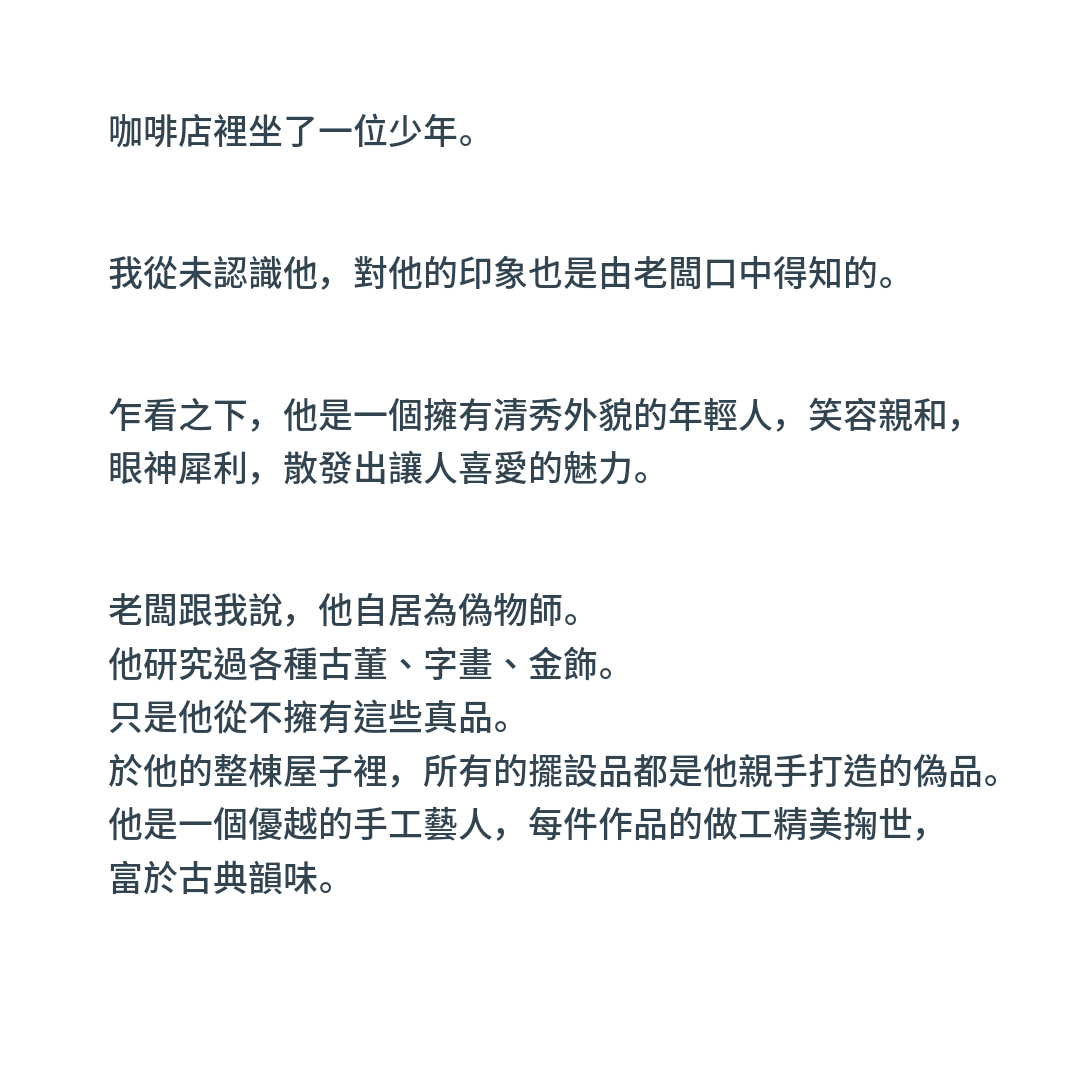

output/page_2.png


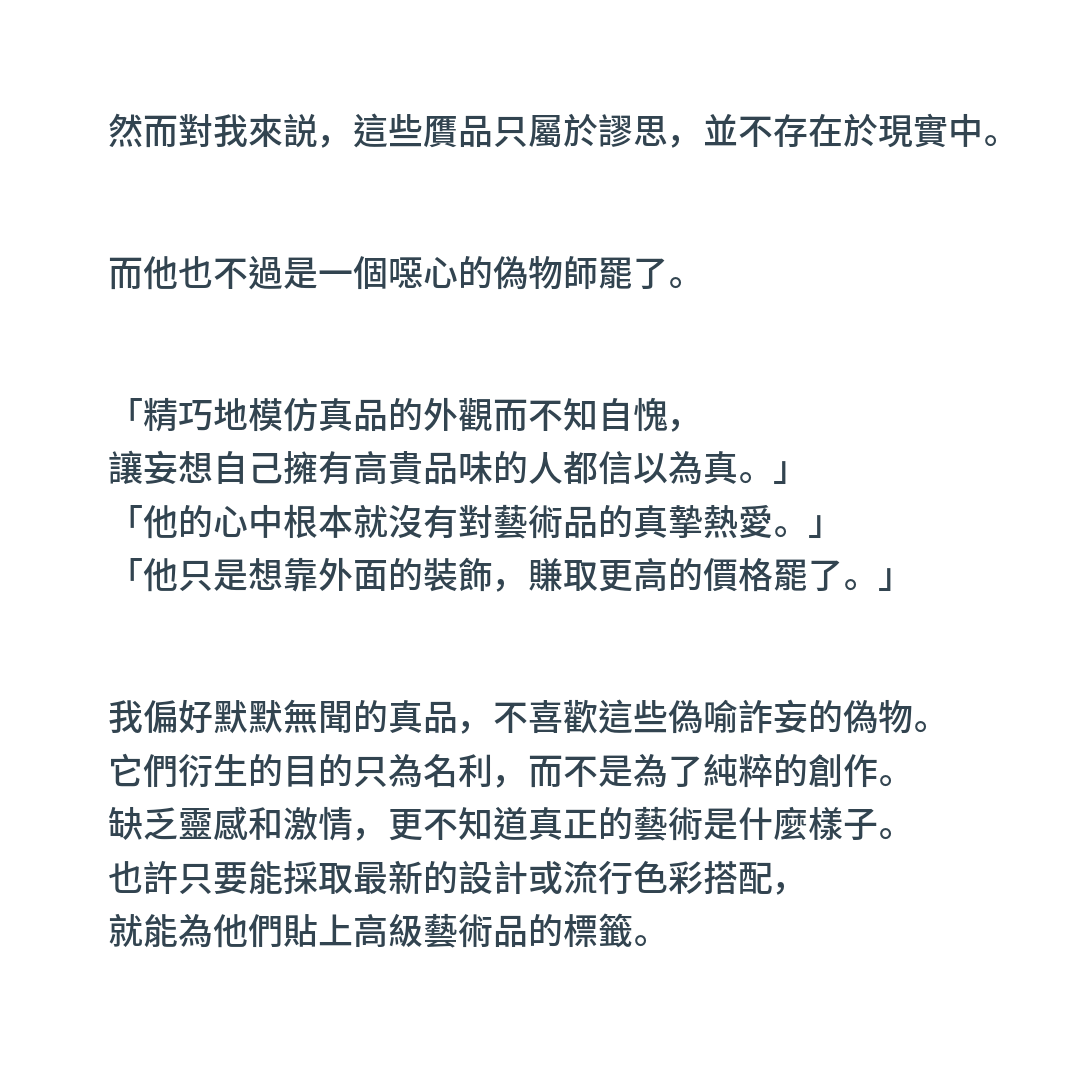

output/page_3.png


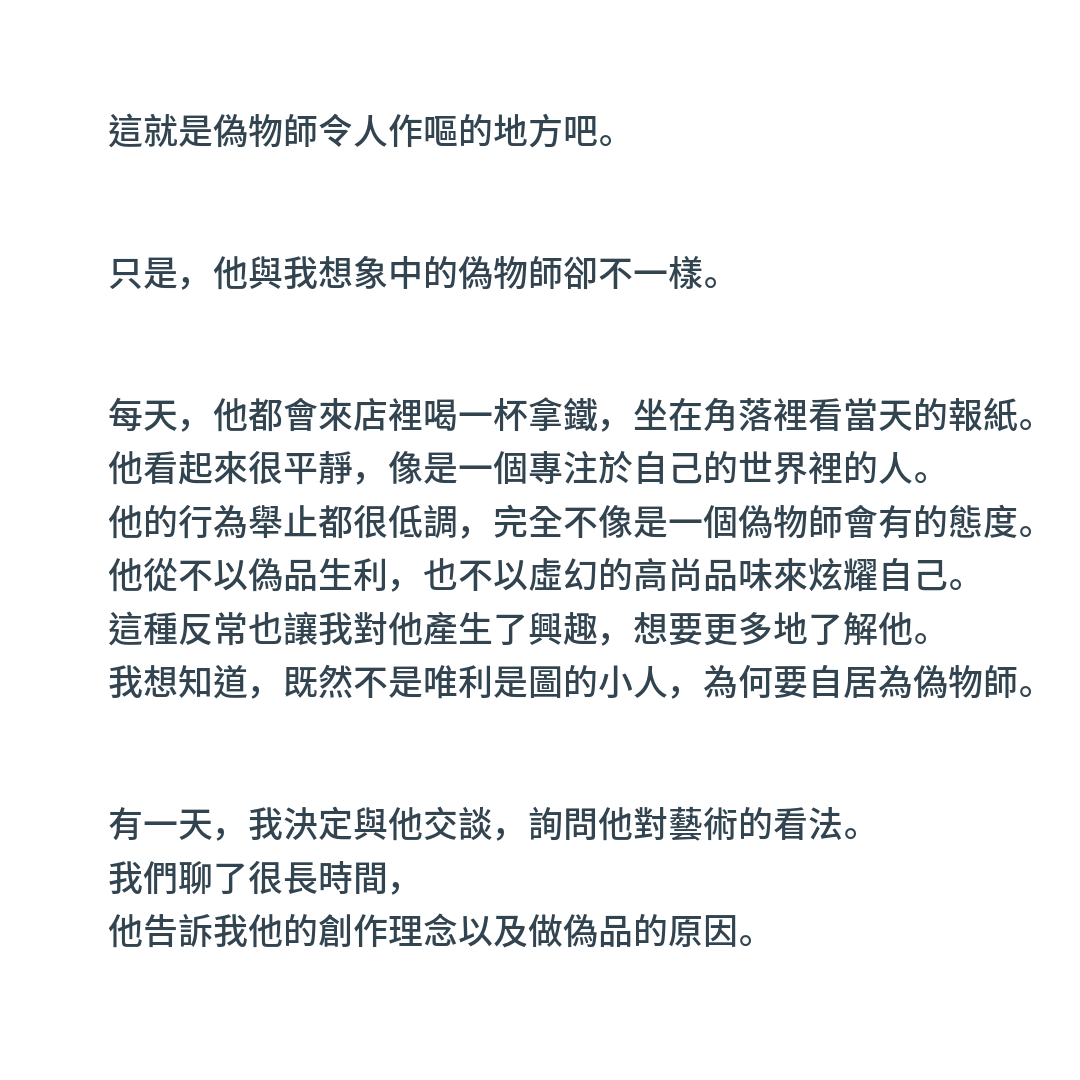

output/page_4.png


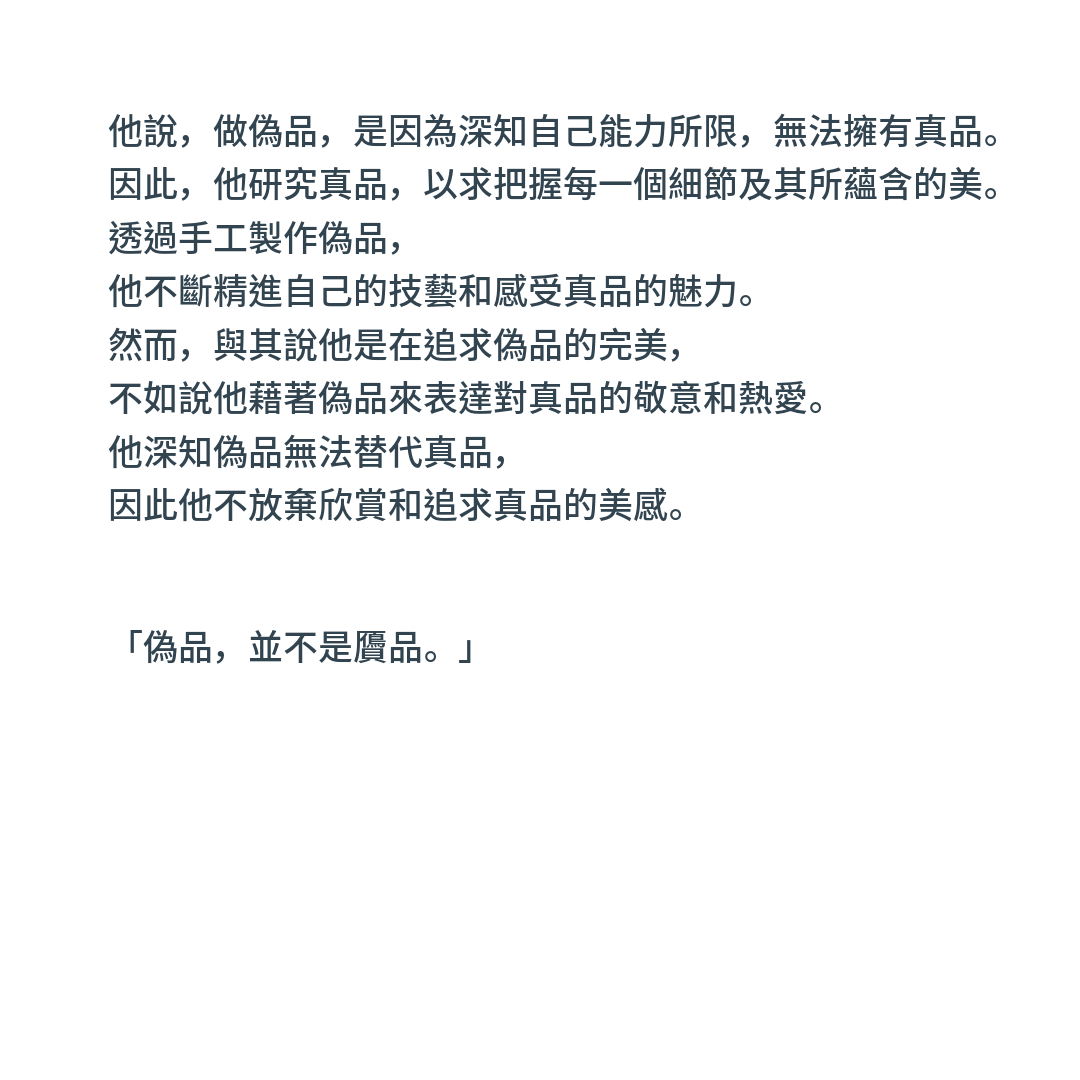

output/page_5.png


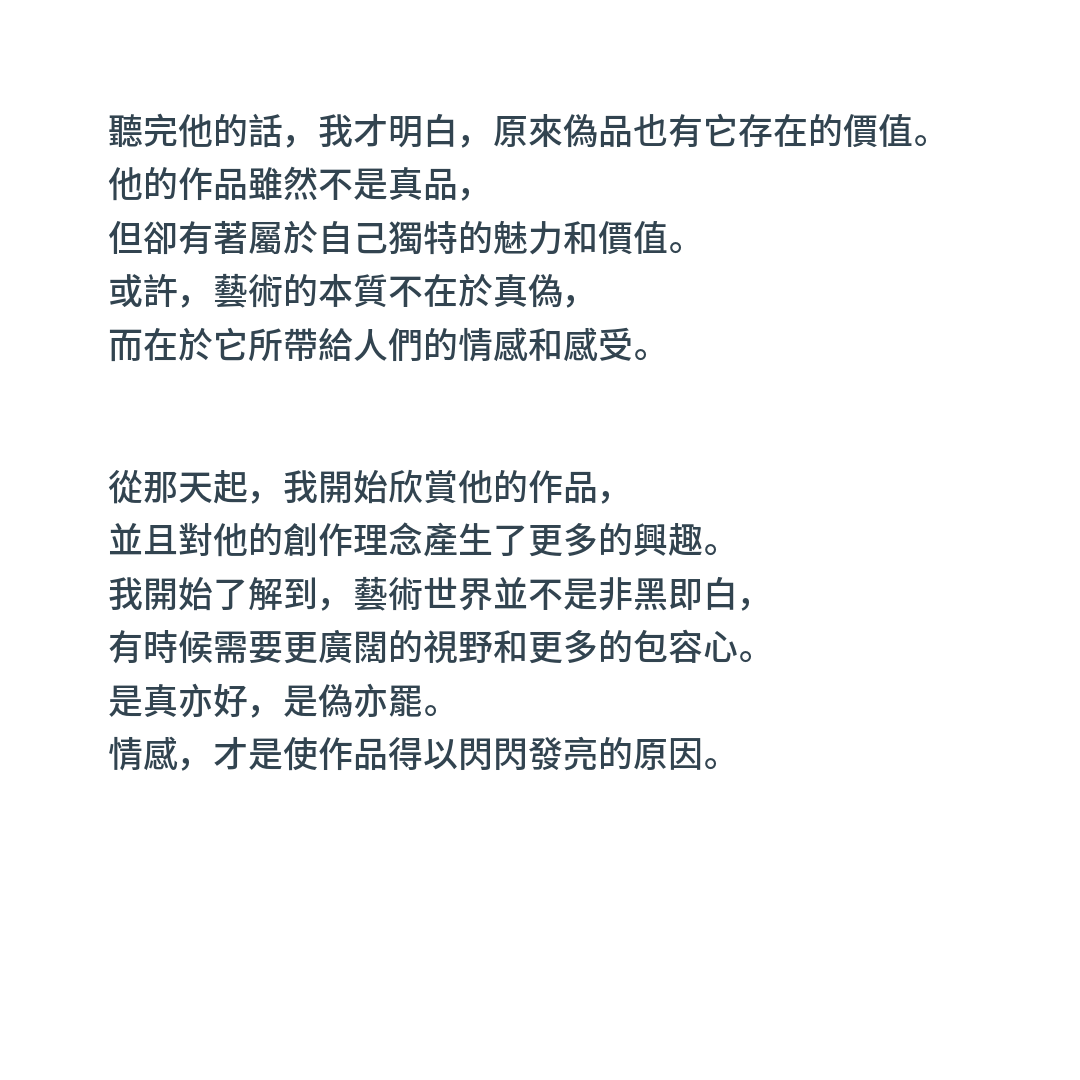

In [162]:
# Initialize the starting position of the text
x, y = MARGIN["x"], MARGIN["y"]
current_image = Image.new('RGB', (PAGE["x"], PAGE["y"]), color=BASE_COLOR)
draw = ImageDraw.Draw(current_image)


MAX_WIDTH = PAGE["x"] - 2 * MARGIN["x"]
MAX_Y = PAGE["y"] - MARGIN["y"] + 2 * (FONT_SIZE + LINE_SPACING)

page_index = 1

for paragraph in paragraphs:
    if "<br>" in paragraph:
        y = PAGE["y"]
        continue
    paragraph += "\n"
    if y + getParagraphHeight(paragraph) > MAX_Y:
        # If not fit, make new image
        current_image.save(getPageName(page_index))
        print(getPageName(page_index))
        display(current_image)


        page_index += 1
        x, y = MARGIN["x"], MARGIN["y"]

        # New Image:
        current_image = Image.new('RGB', (PAGE["x"], PAGE["y"]), color=BASE_COLOR)
        draw = ImageDraw.Draw(current_image)

    # WRITE CODE HERE:
    def jptwStyledPunctuation(
            paragraph,
            pos = (x,y),
            font = FONT,
            spacing = LINE_SPACING,
            fill = TEXT_COLOR
            ):
        lines = paragraph.split("\n")
        current_pos = pos
        for line in lines:
            # Find commas and periods
            punctuation_regex = re.compile(r"[，。]")
            punctuation_matches = punctuation_regex.finditer(line)
            line_index = 0

            # If there is no punctuation
            if not punctuation_regex.search(line):
                # Draw the text before the punctuation
                text_segment = line
                draw.text(
                    current_pos,
                    text=text_segment,
                    font=font,
                    fill=fill
                    )

            for punctuation_match in punctuation_matches:
                # Draw the text before the punctuation
                text_segment = line[line_index:punctuation_match.start()]
                draw.text(
                    current_pos,
                    text=text_segment,
                    font=font,
                    fill=fill
                    )
                line_index = punctuation_match.start() + 1

                # Draw the punctuation
                punctuation_char = line[punctuation_match.start()]
                punctuation_size = (int(font.getlength(punctuation_char)), FONT_SIZE)
                punctuation_offset = (punctuation_size[0] * 0.28,
                                    punctuation_size[1] * 0.28)
                punctuation_pos = (current_pos[0] + int(font.getlength(text_segment)) -
                                punctuation_offset[0],
                                current_pos[1] + punctuation_offset[1])

                draw.text(
                    punctuation_pos,
                    text=punctuation_char,
                    font=font,
                    fill=fill
                    )
                current_pos = (current_pos[0] + int(font.getlength(text_segment)) +
                            punctuation_size[0],
                            current_pos[1])
            draw.text(
                current_pos,
                text=line[line_index:],
                font=font,
                fill=fill
                )
            
            # End of line
            current_pos = (pos[0], current_pos[1] + FONT_SIZE + spacing)

    if isJPTWStyledPunctuation:
        jptwStyledPunctuation(paragraph)
    else:
        draw.multiline_text(
            (x, y),
            paragraph,
            fill=TEXT_COLOR,
            font=FONT,
            spacing=LINE_SPACING
            )
    y += getParagraphHeight(paragraph)
print(getPageName(page_index))
display(current_image)
current_image.save(getPageName(page_index))

---
# Cover Page
---

In [163]:
OVERLAY_PATH = "./assets/overlay.png"
BACKGROUND_PATH = "./input/background.png"


TITLE_OUTPUT_PATH = "./output/cover.png"

TITLE_FONT_SIZE = 118
TITLE_LOCATION = (60, 687)
TITLE_FONT_COLOR = TEXT_COLOR

TITLE_FONT = ImageFont.truetype('./font/NotoSansTC-Regular.otf', size=TITLE_FONT_SIZE)

TITLE_HIGHLIGHT_COLOR = "#fff"
TITLE_HIGHLIGHT_RIGHT_SPACING = 38

In [164]:
# Forge the cover overlay

cover = Image.open(OVERLAY_PATH)

draw = ImageDraw.Draw(cover)


draw.rectangle(
    xy = (
        TITLE_LOCATION[0],
        TITLE_LOCATION[1],
        TITLE_LOCATION[0] + TITLE_FONT.getlength(TITLE) + TITLE_HIGHLIGHT_RIGHT_SPACING, TITLE_LOCATION[1] + TITLE_FONT_SIZE
    ),
    fill = TITLE_HIGHLIGHT_COLOR
)
draw.text(TITLE_LOCATION, TITLE, font=TITLE_FONT, fill=TITLE_FONT_COLOR)

cover.save(TITLE_OUTPUT_PATH)

In [165]:
import pygame

pygame.init()

# Set up the screen
screen_width = 600
screen_height = 600

scale_factor_x = screen_width / PAGE["x"]
scale_factor_y = screen_width / PAGE["y"]

screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption("Editor")

# Set up the overlay 
overlay = pygame.image.load(TITLE_OUTPUT_PATH)
scaled_overlay = pygame.transform.scale(
    overlay,
    (screen_width, screen_height)
)

# Set up the movable object
class MovableObject:
    pos = (0, 0)
    picture = pygame.image.load(BACKGROUND_PATH)
    scale = 1.0
    size = (picture.get_width(), picture.get_height())

    def __init__(self, picture_path = BACKGROUND_PATH):
        self.picture = pygame.image.load(picture_path)
    
    def getActualSize(self):
        return (
            int(self.size[0] / scale_factor_x),
            int(self.size[1] / scale_factor_y)
        )
    def getActualPos(self):
        return (
            int(self.pos[0] / scale_factor_x),
            int(self.pos[1] / scale_factor_y)
        )

    def transform(self, pos = (None, None), scale = -1):
        if pos != (None, None):
            self.pos = pos
        if scale != -1:
            self.scale = scale
            self.size = (self.picture.get_width() * self.scale,
                         self.picture.get_height() * self.scale)
    
    def setSize(self, size):
        self.size = size
        self.scale = size[0] / self.picture.get_width()

    def zoom(self, zoomtransform = 10):
        new_size = (self.size[0] + zoomtransform,
                    self.size[1] + zoomtransform * self.size[1] / self.size[0])
        self.setSize(new_size)

    def drawObject(self, screen):
        scaled_object = pygame.transform.scale(
            self.picture,
            self.size
        )
        screen.blit(scaled_object, self.pos)

# Create an Object
object = MovableObject()
dragging = False
drag_offset = (0, 0)
original_position = (0, 0)



# Display Loop
running = True
while running:
    keys = pygame.key.get_pressed()

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            drag_offset = (event.pos[0], event.pos[1])
            original_position = object.pos
            dragging = True

            # * ZOOMING
            isSlowScroll = keys[pygame.K_LCTRL] or keys[pygame.K_RCTRL]

            # Scroll wheel up
            if event.button == 4:
                if isSlowScroll:
                    object.zoom(10)
                else:
                    object.zoom(100)
            elif event.button == 5:
                if isSlowScroll:
                    object.zoom(-10)
                else:
                    object.zoom(-100)

        elif event.type == pygame.MOUSEBUTTONUP:
            dragging = False
        elif event.type == pygame.MOUSEMOTION:
            if dragging:
                x1 = event.pos[0] - drag_offset[0] + original_position[0]
                y1 = event.pos[1] - drag_offset[1] + original_position[1]
                object.transform(pos=(x1, y1))

    screen.fill(pygame.Color("#cccccc"))
    # Add Background
    object.drawObject(screen)

    # Add Overlay
    screen.blit(scaled_overlay, (0,0))
    pygame.display.update()

pygame.quit()

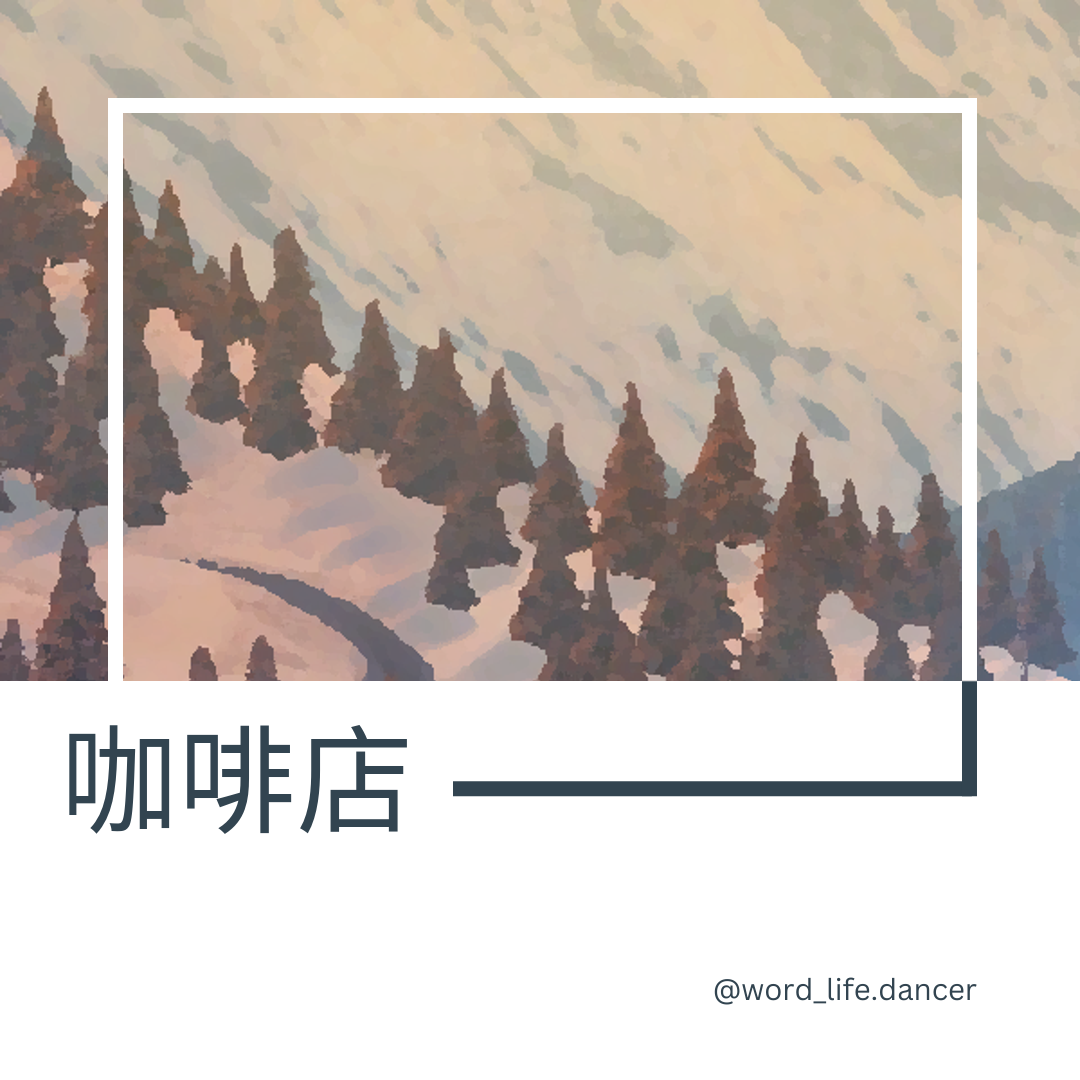

In [166]:
# Get Overlay
overlay_image = Image.open(TITLE_OUTPUT_PATH).convert("RGBA")

# Get Background
background_image = Image.open(BACKGROUND_PATH)
scaled_background_image = background_image.resize(object.getActualSize())

# Background 
canvas = Image.new(
    color="#cccccc",
    mode="RGBA",
    size=(PAGE["x"], PAGE["y"])
)


canvas.paste(scaled_background_image, object.getActualPos(), )
canvas.paste(overlay_image, (0,0), overlay_image)

canvas.show()

display(canvas)
canvas.save(TITLE_OUTPUT_PATH)